In [1]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("csv/finance_all.csv")
prefix_list = ["BA","NFLX","TSLA","BTC-USD"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1180 non-null   object 
 1   ^GSPC_Open          814 non-null    float64
 2   ^GSPC_High          814 non-null    float64
 3   ^GSPC_Low           814 non-null    float64
 4   ^GSPC_Close         814 non-null    float64
 5   ^GSPC_Adj Close     814 non-null    float64
 6   ^GSPC_Volume        814 non-null    float64
 7   EURUSD=X_Open       844 non-null    float64
 8   EURUSD=X_High       844 non-null    float64
 9   EURUSD=X_Low        844 non-null    float64
 10  EURUSD=X_Close      844 non-null    float64
 11  EURUSD=X_Adj Close  844 non-null    float64
 12  EURUSD=X_Volume     844 non-null    float64
 13  BA_Open             814 non-null    float64
 14  BA_High             814 non-null    float64
 15  BA_Low              814 non-null    float64
 16  BA_Clo

In [6]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df1 = df[df.index.weekday < 5]
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844 entries, 2020-09-01 to 2023-11-24
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                844 non-null    object 
 1   ^GSPC_Open          814 non-null    float64
 2   ^GSPC_High          814 non-null    float64
 3   ^GSPC_Low           814 non-null    float64
 4   ^GSPC_Close         814 non-null    float64
 5   ^GSPC_Adj Close     814 non-null    float64
 6   ^GSPC_Volume        814 non-null    float64
 7   EURUSD=X_Open       844 non-null    float64
 8   EURUSD=X_High       844 non-null    float64
 9   EURUSD=X_Low        844 non-null    float64
 10  EURUSD=X_Close      844 non-null    float64
 11  EURUSD=X_Adj Close  844 non-null    float64
 12  EURUSD=X_Volume     844 non-null    float64
 13  BA_Open             814 non-null    float64
 14  BA_High             814 non-null    float64
 15  BA_Low              814 non-null    fl

In [7]:
df.dropna(inplace=True)

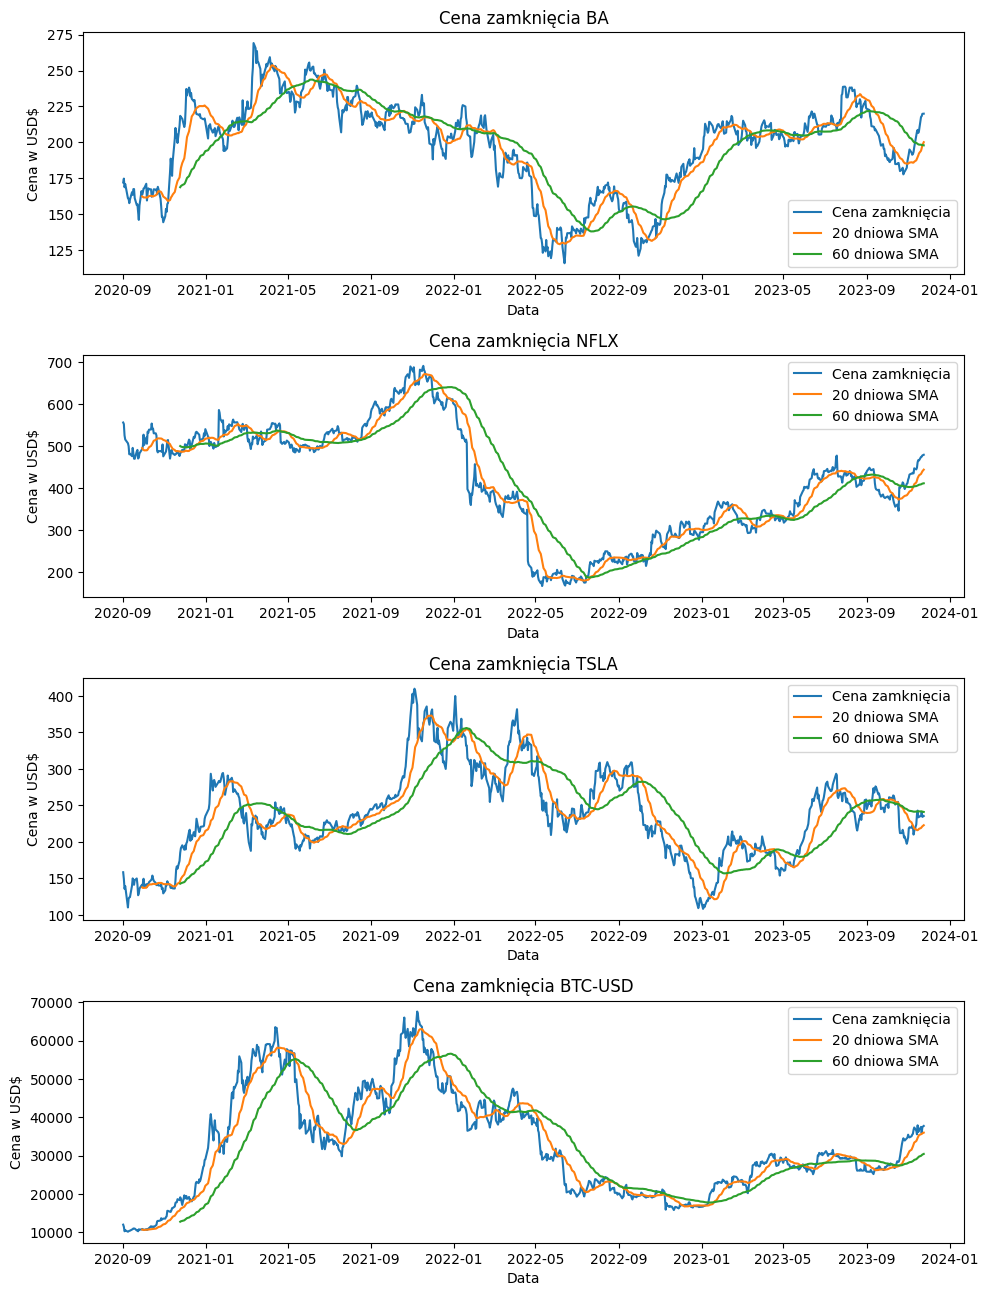

In [58]:
plt.figure(figsize=(10, 4 * 8))

for i, stock_name in enumerate(prefix_list, 1):
    short_rolling = df[stock_name+'_Close'].rolling(window=20).mean()
    long_rolling = df[stock_name+'_Close'].rolling(window=60).mean()

    plt.subplot(10, 1, i)
    plt.plot(df[stock_name+'_Close'], label='Cena zamknięcia')
    plt.plot(short_rolling, label='20 dniowa SMA')
    plt.plot(long_rolling, label='60 dniowa SMA')
    plt.title(f'Cena zamknięcia {stock_name}')
    plt.xlabel('Data')
    plt.ylabel('Cena w USD$')
    plt.legend()

plt.tight_layout()
plt.show()

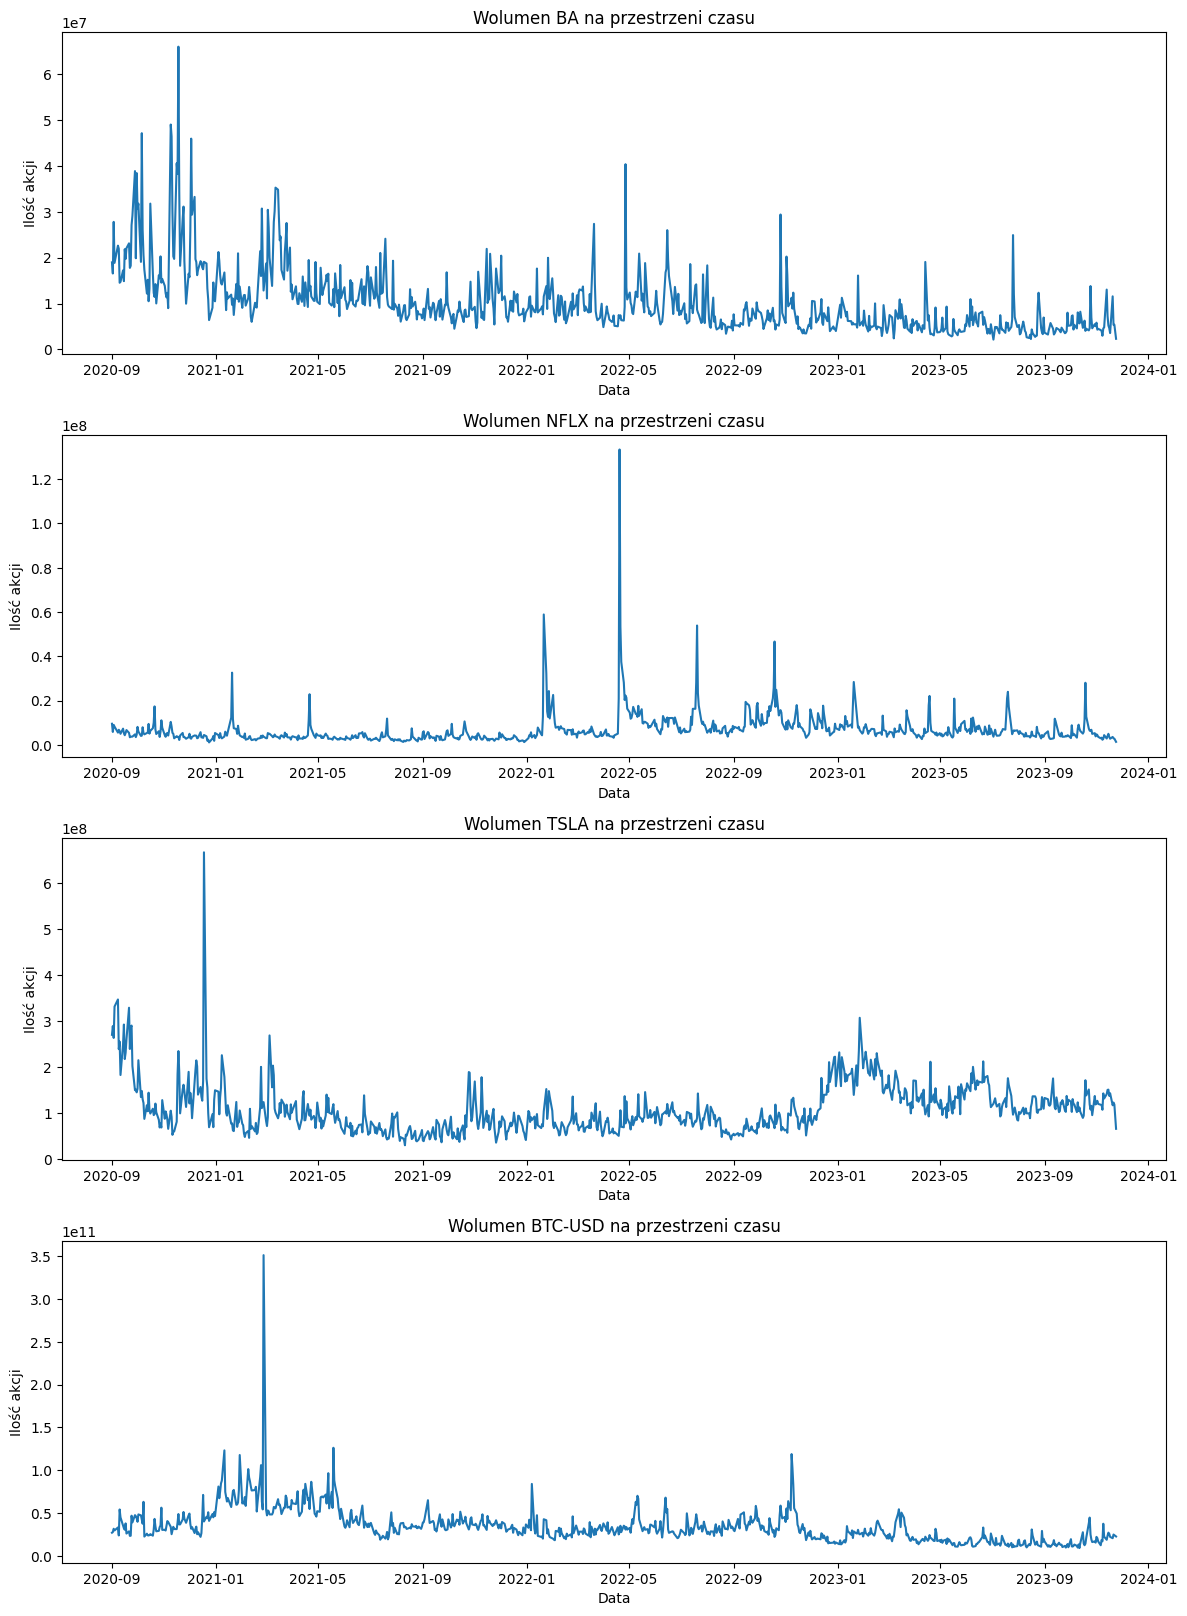

In [54]:
plt.figure(figsize=(12, 4 * 10))

for i, stock_name in enumerate(prefix_list, 1):
    plt.subplot(10, 1, i)
    plt.plot(df[stock_name+'_Volume'])
    plt.title(f'Wolumen {stock_name} na przestrzeni czasu')
    plt.xlabel('Data')
    plt.ylabel('Ilość akcji')

plt.tight_layout()
plt.show()

In [64]:
df['BTC-USD_Close'].pct_change() * 100
df['BTC-USD_Close'].pct_change(5) * 100
df['BTC-USD_Close'].pct_change(10) * 100
df['BTC-USD_Close'].pct_change(20) * 100


Date
2020-09-01         NaN
2020-09-02   -0.046485
2020-09-03   -0.102395
2020-09-04    0.026014
2020-09-08   -0.036178
                ...   
2023-11-17    0.012223
2023-11-20    0.024053
2023-11-21   -0.044378
2023-11-22    0.045193
2023-11-24    0.007692
Name: BTC-USD_Close, Length: 814, dtype: float64

In [63]:
df['BTC-USD_Close']

Date
2020-09-01    11970.478516
2020-09-02    11414.034180
2020-09-03    10245.296875
2020-09-04    10511.813477
2020-09-08    10131.516602
                  ...     
2023-11-17    36596.683594
2023-11-20    37476.957031
2023-11-21    35813.812500
2023-11-22    37432.339844
2023-11-24    37720.281250
Name: BTC-USD_Close, Length: 814, dtype: float64

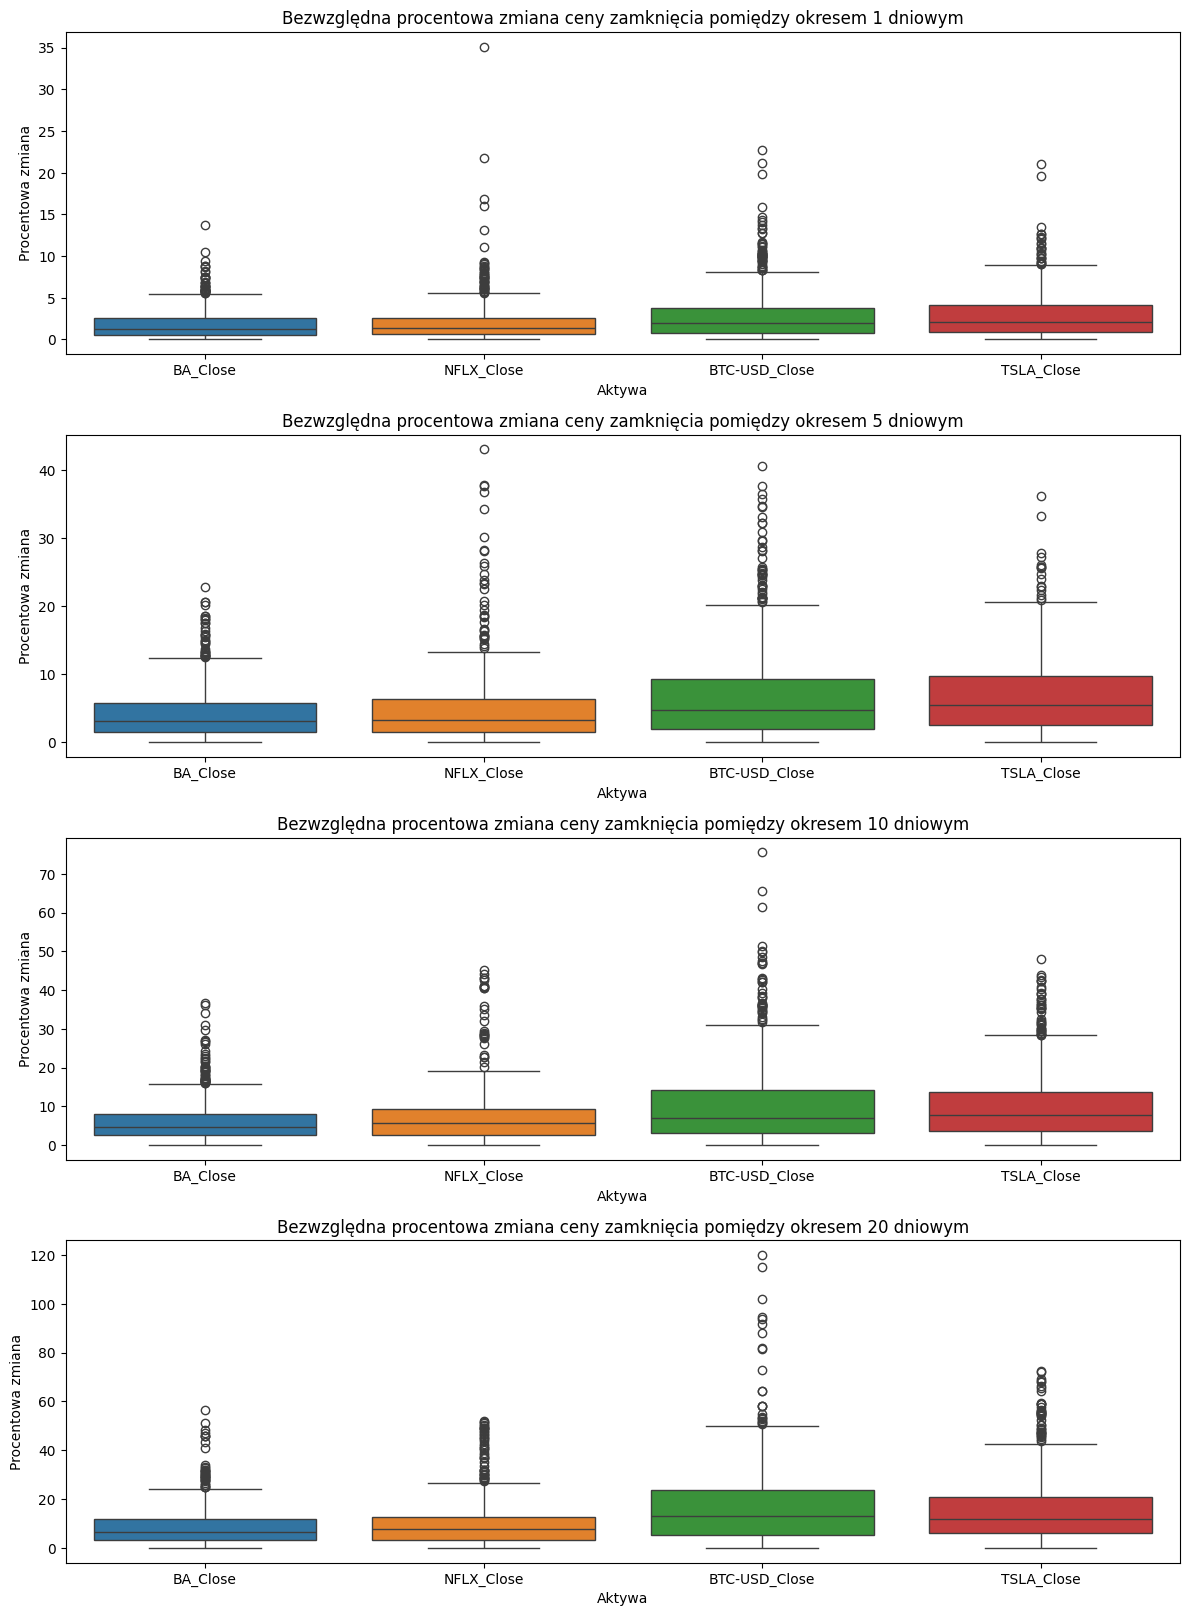

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4 * 10))

step_list = [1, 5, 10, 20]
for i, step in enumerate(step_list, 1):
    plt.subplot(10, 1, i)
    
    pct_change_data = df.filter(like='_Close').drop(columns=["^GSPC_Close", "EURUSD=X_Close"]).pct_change(step).abs() * 100
    
    boxplot = sns.boxplot(data=pct_change_data)
    plt.title(f'Bezwzględna procentowa zmiana ceny zamknięcia pomiędzy okresem {step} dniowym')
    plt.xlabel('Aktywa')
    plt.ylabel('Procentowa zmiana')

plt.tight_layout()
plt.show()

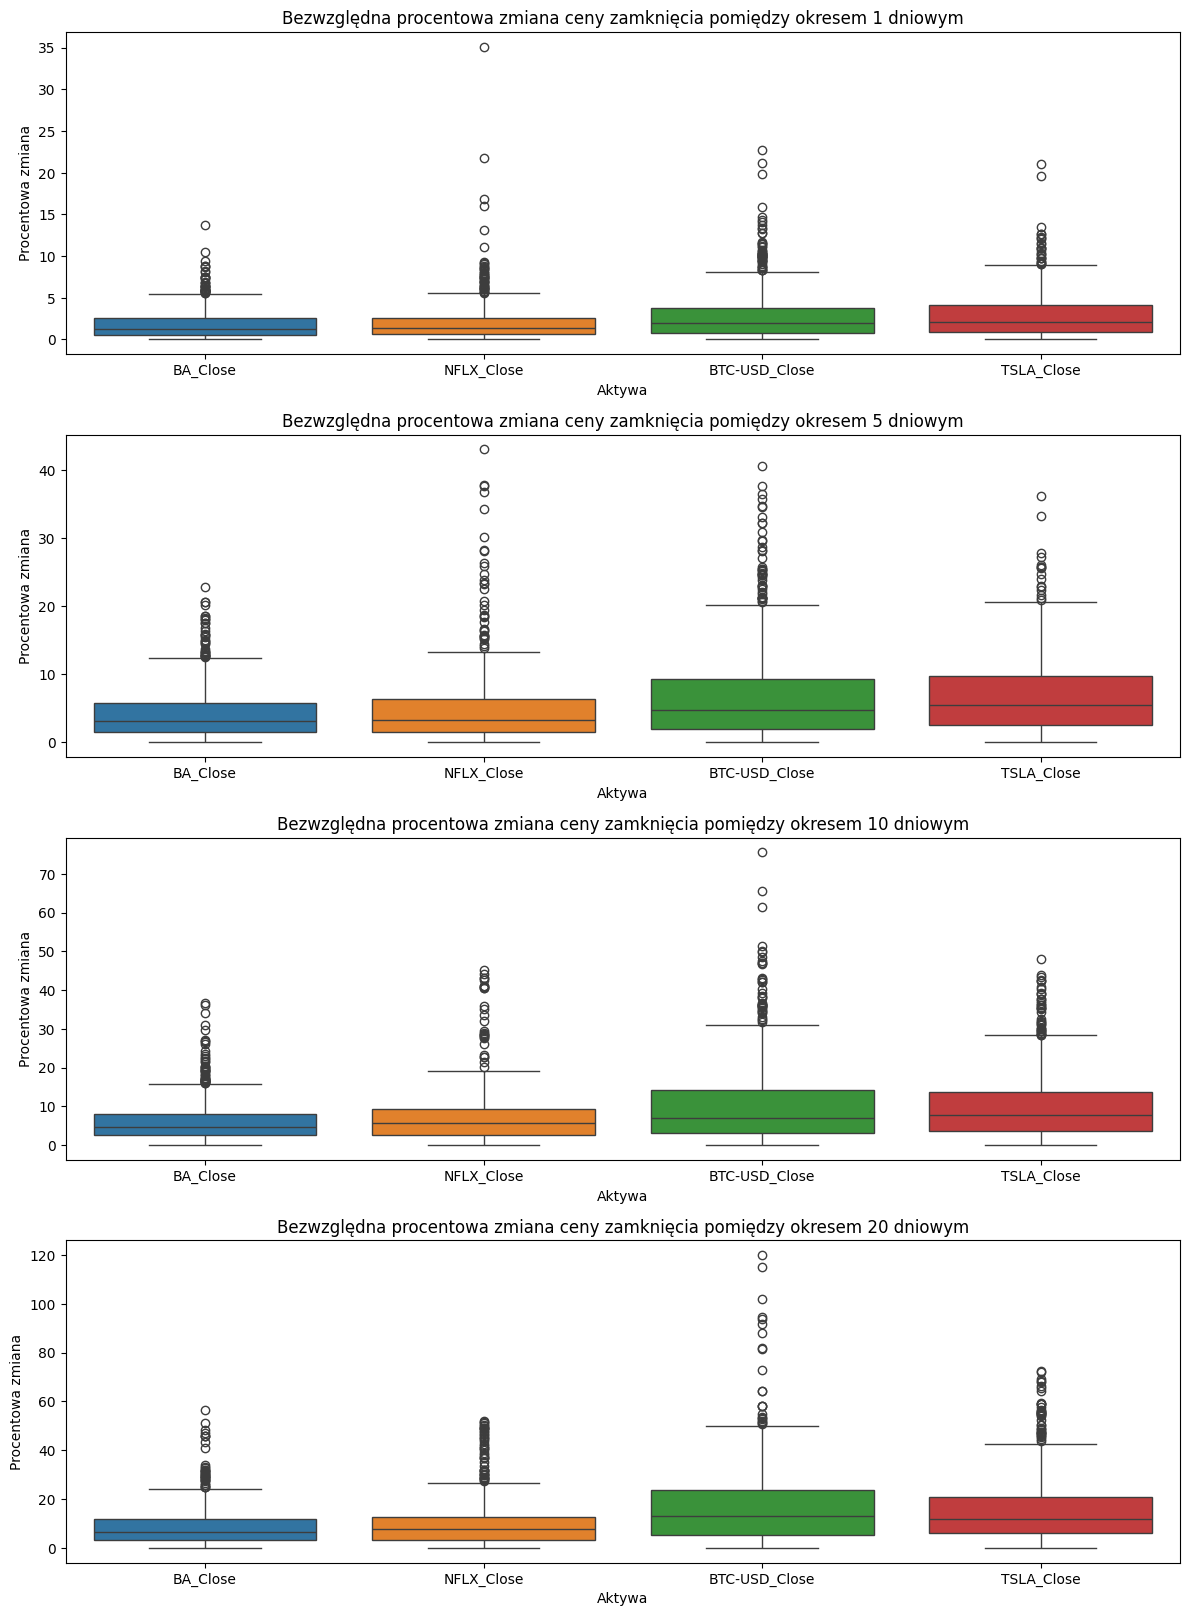

In [11]:
plt.figure(figsize=(12, 4 * 10))

step_list = [1,5,10,20]
for i, step in enumerate(step_list, 1):
    plt.subplot(10, 1, i)
    
    sns.boxplot(data=df.filter(like='_Close').drop(columns=["^GSPC_Close","EURUSD=X_Close"]).pct_change(step).abs() * 100)
    plt.title(f'Bezwzględna procentowa zmiana ceny zamknięcia pomiędzy okresem {step} dniowym')
    plt.xlabel('Aktywa')
    plt.ylabel('Procentowa zmiana')

plt.tight_layout()
plt.show()

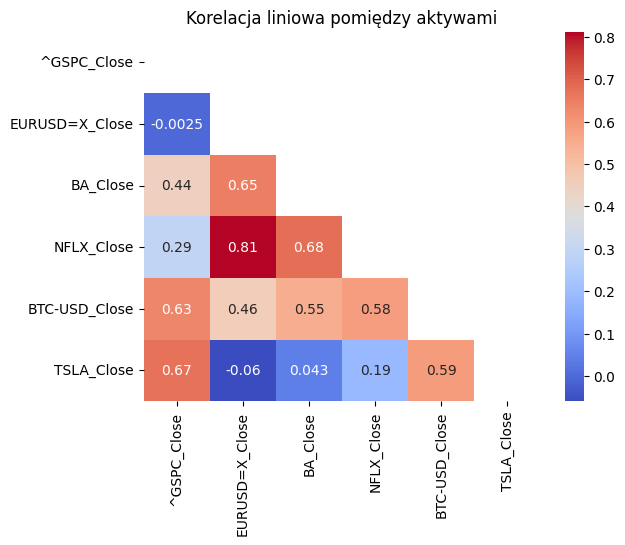

In [78]:
corr_matrix = df.filter(like='_Close').corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title("Korelacja liniowa pomiędzy aktywami")
plt.show()

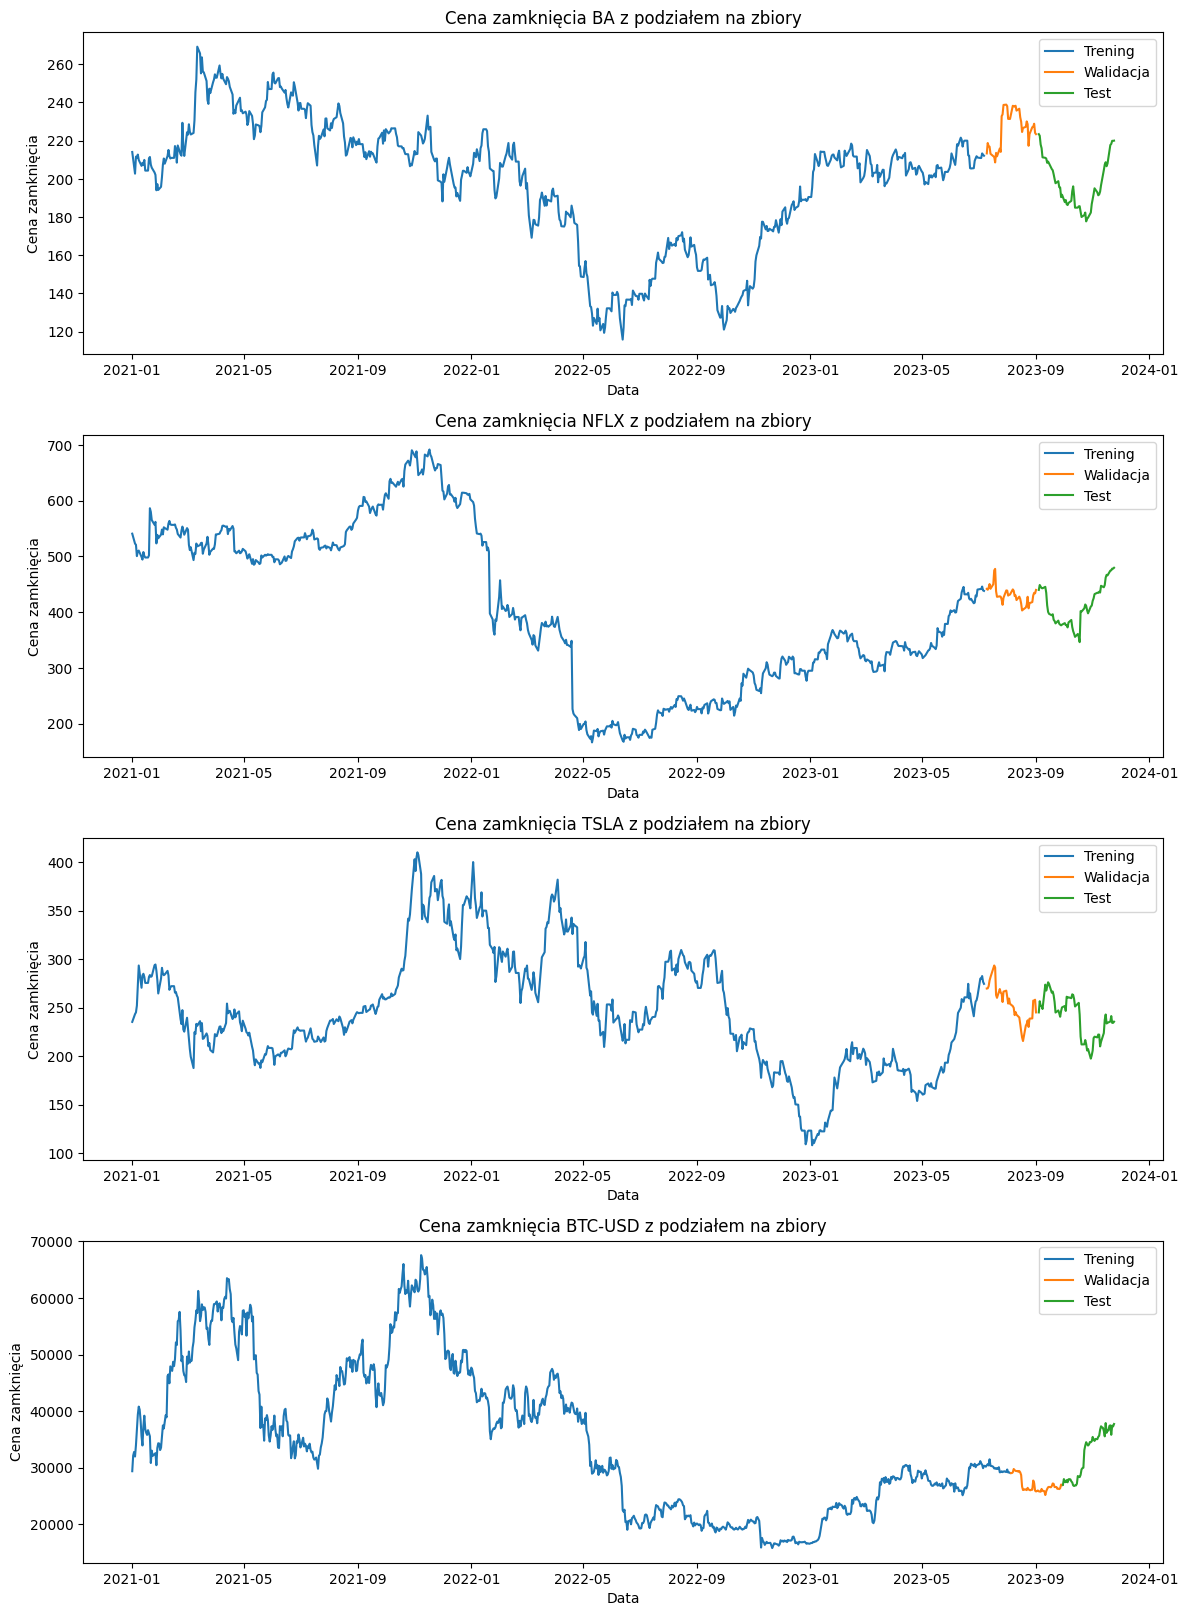

In [ ]:
# Wykresy dla przeprecessowanych danych
btc_df = pd.read_csv('csv/BTC-USD/BTC-USD_with_weekends.csv')

btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.set_index('Date')

prefix_list = ['BA','NFLX', 'TSLA']
df_list = []
for prefix in prefix_list:
    df = pd.read_csv(f'csv/{prefix}/{prefix}_without_weekends.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df_list.append(df)
    
train_start_date = '2021-01-01'
train_end_date = '2023-07-07'
val_start_date = '2023-07-08'
val_end_date = '2023-09-01'
test_start_date = '2023-09-02'

plt.figure(figsize=(12, 4 * 10))

# Plot dla BA, NFLX, TSLA
for i, (prefix,df) in enumerate(zip(prefix_list,df_list), 1):
    plt.subplot(10, 1, i)
    train_data = df[train_start_date:train_end_date][f'{prefix}_Close']
    val_data = df[val_start_date:val_end_date][f'{prefix}_Close']
    test_data = df[test_start_date:][f'{prefix}_Close']
    plt.plot(train_data.index, train_data, label='Trening')
    plt.plot(val_data.index, val_data, label='Walidacja')
    plt.plot(test_data.index, test_data, label='Test')
    plt.xlabel('Data')
    plt.ylabel('Cena zamknięcia')
    plt.title(f'Cena zamknięcia {prefix} z podziałem na zbiory')
    plt.legend()

train_start_date = '2021-01-01'
train_end_date = '2023-08-04'
val_start_date = '2023-08-05'
val_end_date = '2023-09-29'
test_start_date = '2023-09-30'

train_data = btc_df[train_start_date:train_end_date]['BTC-USD_Close']
val_data = btc_df[val_start_date:val_end_date]['BTC-USD_Close']
test_data = btc_df[test_start_date:]['BTC-USD_Close']
plt.subplot(10, 1, 4)

# Plot dla BTC
plt.plot(train_data.index, train_data, label='Trening')
plt.plot(val_data.index, val_data, label='Walidacja')
plt.plot(test_data.index, test_data, label='Test')

plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.title(f'Cena zamknięcia BTC-USD z podziałem na zbiory')
plt.legend()

plt.tight_layout()
plt.show()